# Constructing a monovariate sensitivity analysis

# Preliminaries
## Importing packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-03 08:46:23.567490


# Define Landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the Evolutionary Algorithm
2 Experiments -> Each with a 100 runs -> Each with different maximum step for mutation
## Setting the EA's parameters

In [4]:
#starting seed
np.random.seed(654321)

## Setting data storage

In [5]:
mult_res_cols = ['exp'] + ['mut_s'] + ['run', 'generation', 'fitness_min', 'fitness_max', 'fitness_mean', 'fitness_std']
multi_res = pd.DataFrame(columns=mult_res_cols)
multi_res = multi_res.infer_objects()

## Parameters common to all experiments

In [6]:
#Algorithm parameters
## Number of experiments, and generations per experiment
run_n = 50
gen_f = 40

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 10

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'Simple'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = [1, 2.5, 5, 7.5, 10]

## New population selection method
population_new='Ranking'

### First experiment
Maximum mutation step = 1

In [7]:
#Algorithm parameters
##Experiment number
exp_n = 1
## Progeny subpopulation's and size
### Mutation method, probability and size
a = mut_s[0]

In [8]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, a, par_selection, crossover, mutation, population_new)

In [9]:
fitness_res.insert(0,'mut_s',int(a))
fitness_res.insert(0,'exp',int(exp_n))
multi_res = multi_res.append(fitness_res, ignore_index=True)
multi_res = multi_res.infer_objects()

### Second experiment
Maximum mutation step = 2.5

In [10]:
exp_n += 1
a = mut_s[1]

In [11]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, a, par_selection, crossover, mutation, population_new)

In [12]:
#query = (fitness_res['generation']==gen_f)
#a = fitness_res[query]
fitness_res.insert(0,'mut_s',a)
fitness_res.insert(0,'exp',exp_n)
multi_res = multi_res.append(fitness_res, ignore_index=True)

### Third experiment
Maximum mutation step = 5

In [13]:
exp_n += 1
a = mut_s[2]

In [14]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, a, par_selection, crossover, mutation, population_new)

In [15]:
#query = (fitness_res['generation']==gen_f)
#a = fitness_res[query]
fitness_res.insert(0,'mut_s',a)
fitness_res.insert(0,'exp',exp_n)
multi_res = multi_res.append(fitness_res, ignore_index=True)

### Fourth experiment
Maximum mutation step = 7.5

In [16]:
exp_n += 1
a = mut_s[3]

In [17]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, a, par_selection, crossover, mutation, population_new)

In [18]:
#query = (fitness_res['generation']==gen_f)
#a = fitness_res[query]
fitness_res.insert(0,'mut_s',a)
fitness_res.insert(0,'exp',exp_n)
multi_res = multi_res.append(fitness_res, ignore_index=True)

### Fifth experiment
Maximum mutation step = 10

In [19]:
exp_n += 1
a = mut_s[4]

In [20]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, a, par_selection, crossover, mutation, population_new)

In [21]:
#query = (fitness_res['generation']==gen_f)
#a = fitness_res[query]
fitness_res.insert(0,'mut_s',int(a))
fitness_res.insert(0,'exp',int(exp_n))
multi_res = multi_res.append(fitness_res, ignore_index=True)

# Data Analysis

In [22]:
query = (multi_res['generation']==gen_f)
multi_final_fitness_res = multi_res[query].apply(pd.to_numeric)

(0, 0.6141859810496545)

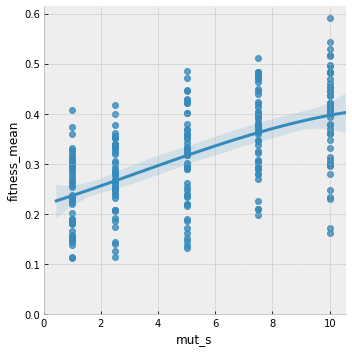

In [23]:
sns.lmplot(x='mut_s', y='fitness_mean', order=3, data=multi_final_fitness_res)
plt.xlim(0,None)
plt.ylim(0,None)

(0, 0.5059164209562547)

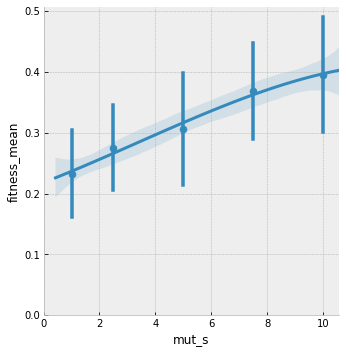

In [26]:
sns.lmplot(x='mut_s', y='fitness_mean', order=3, data=multi_final_fitness_res, x_bins=5, x_ci='sd')
plt.xlim(0,None)
plt.ylim(0,None)

In [25]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-03 08:49:01.424883
0:02:37.857393


In [15]:
genera_res.info()
print()
fitness_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61000 entries, 0 to 60999
Data columns (total 7 columns):
run           61000 non-null int64
generation    61000 non-null int64
birthdate     61000 non-null int64
function      61000 non-null object
fitness       61000 non-null float64
gen_x         61000 non-null float64
gen_y         61000 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 8 columns):
exp             2050 non-null int64
mut_s           2050 non-null int64
run             2050 non-null int64
generation      2050 non-null int64
fitness_min     2050 non-null float64
fitness_max     2050 non-null float64
fitness_mean    2050 non-null float64
fitness_std     2050 non-null float64
dtypes: float64(4), int64(4)
memory usage: 144.1 KB


In [31]:
multi_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 8 columns):
exp             10250 non-null int64
mut_s           10250 non-null float64
run             10250 non-null int64
generation      10250 non-null int64
fitness_min     10250 non-null float64
fitness_max     10250 non-null float64
fitness_mean    10250 non-null float64
fitness_std     10250 non-null float64
dtypes: float64(5), int64(3)
memory usage: 640.7 KB


In [36]:
multi_final_fitness_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 40 to 10249
Data columns (total 8 columns):
exp             250 non-null int64
mut_s           250 non-null float64
run             250 non-null int64
generation      250 non-null int64
fitness_min     250 non-null float64
fitness_max     250 non-null float64
fitness_mean    250 non-null float64
fitness_std     250 non-null float64
dtypes: float64(5), int64(3)
memory usage: 17.6 KB
